In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
# The data is tab separated and the first column has the gene names
# Remember that most things in python are zero-indexed, so the first
# column is index 0
df = pd.read_csv('../Pabio536/C4-5_ Numpy and pandas/data/GSE88741-expression.txt', sep='\t', index_col=0)
df_sample = df.sample(100, axis = 0, random_state = 333)
meta = pd.read_excel("../Pabio536/C4-5_ Numpy and pandas/data/GSE88741-metadata.xlsx", index_col=1)
columns = meta.index
df_sample.columns = columns
#print (df_sample.head())
print(df_sample.iloc[0,:5])

Sample Title
FM_1           1
FM_2           1
FM_3           1
SK_MEL_28_1    4
SK_MEL_28_2    0
Name: ASPDH, dtype: int64


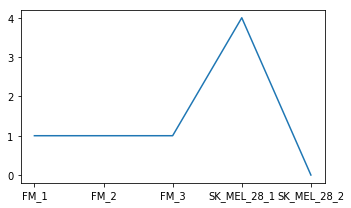

In [24]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(df_sample.iloc[0,:5])
#ax.set_title('Combined debt growth over time')
#ax.legend(loc='upper left')
#ax.set_ylabel('Total debt')
#ax.set_xlim(xmin=yrs[0],xmax=yrs[-1])
fig.tight_layout()

In [16]:
rnd

array([[3, 4, 5, 0, 5, 0, 1, 6, 5, 4, 3, 9, 5, 8, 4, 2, 2, 8, 0, 3, 5, 2,
        2, 6, 3, 3, 0, 7, 1, 0, 2, 4, 2, 1, 5, 8, 3, 5, 7, 7, 5, 0, 4, 1,
        4, 4, 7, 6, 6, 3],
       [8, 7, 7, 6, 0, 3, 4, 4, 0, 9, 9, 6, 8, 8, 7, 1, 2, 0, 5, 5, 9, 2,
        8, 3, 1, 9, 8, 6, 6, 8, 7, 4, 3, 1, 2, 2, 8, 5, 8, 5, 4, 6, 0, 6,
        0, 0, 9, 9, 3, 9],
       [9, 1, 7, 0, 9, 4, 9, 4, 3, 9, 6, 7, 7, 2, 5, 9, 0, 9, 8, 4, 8, 2,
        7, 3, 2, 1, 0, 7, 7, 7, 7, 1, 5, 5, 2, 7, 2, 3, 4, 7, 6, 8, 4, 6,
        8, 5, 7, 7, 1, 8]])